# 15.077: Problem Set 4
Alex Berke (aberke)

From

Rice, J.A., Mathematical Statistics and Data Analysis (with CD Data Sets), 3rd ed., Duxbury, 2007 (ISBN 978-0-534-39942-9).

Hastie, T., Tibshirani, R., and Friedman, J., The Elements of Statistical Learning: Data Mining, Inference and Prediction, Springer, 2nd ed., 2009 (ISBN 978-0-387-84857-0).  https://web.stanford.edu/~hastie/ElemStatLearn/

In [50]:
%config Completer.use_jedi = False # autocomplete

import math
import  re

import numpy as np
import pandas as pd
import scipy.special
from scipy import stats


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Problems

### 1. Rice 12.29: The performance of a semiconductor depends upon the thickness of a layer of silicon dioxide. In an experiment (Czitrom and Reece, 1997), layer thicknesses were measured at three furnace locations for three types of wafers (virgin wafers, recycled in-house wafers, and recycled wafers from an external source). The data are contained in the file waferlayers. Conduct a two-way analysis of variance and test for significance of main effects and interactions. Construct a graph such as that shown in Figure 12.3. Does the comparison of layer thicknesses depend on furnace location? 


In [3]:
waferlayers  = pd.read_csv('waferlayers.txt').apply(lambda s: s.replace("'", ""), axis=1)
waferlayers.columns = [c.replace("'", "") for c in waferlayers.columns]
waferlayers['Furnace'] = waferlayers['Furnace'].str.replace("'", "")
waferlayers['Wafer Type'] = waferlayers['Wafer Type'].str.replace("'", "")
waferlayers

,Furnace,Wafer Type,Thickness
0,1,Virgin,90.1
1,1,Virgin,90.7
2,1,Virgin,89.4
3,1,In-House,90.4
4,1,In-House,88.8
5,1,In-House,90.6
6,1,External,92.6
7,1,External,90.0
8,1,External,93.3
9,2,Virgin,91.9


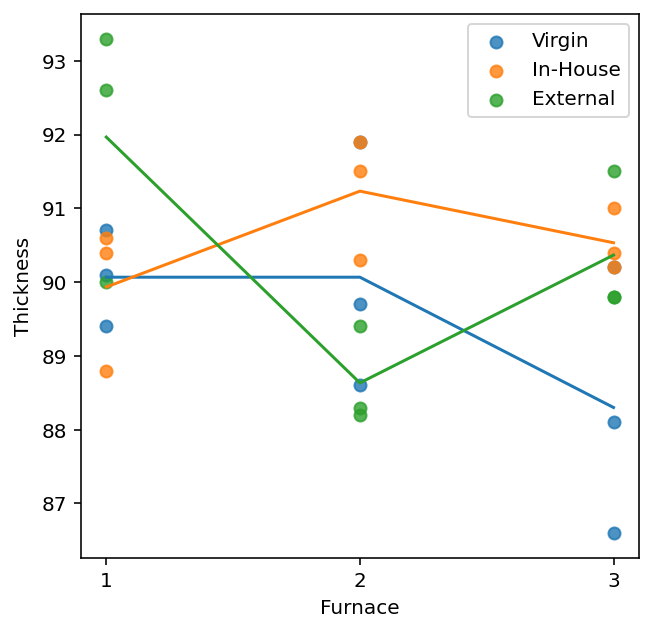

In [4]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
wafer_types = waferlayers['Wafer Type'].unique()
for wt in wafer_types:
    wafers = waferlayers[waferlayers['Wafer Type']==wt]
    wafers_mean = wafers.groupby('Furnace').mean().reset_index()
    ax.scatter(wafers['Furnace'], wafers['Thickness'], label=wt, alpha=0.8)
    ax.plot(wafers_mean['Furnace'], wafers_mean['Thickness'])

ax.set_ylabel('Thickness')
ax.set_xlabel('Furnace')
_ = ax.legend()

#### Plot
In the plot, points show point thickness values for wafer types and the lines show the mean thickness values for those wafer types.

#### Two-way ANOVA test for significance of main effects and interactions

Does the comparison of layer thicknesses depend on furnace location?

We would  like to use normal theory and must check the assumptions that the errors or standard deviations  are independently distributed from the means.
This assumption holds, as shown below.

The following Two-way ANOVA test shows that the main effects are not statistically significant but that there is a statistically significant  interaction (p < 0.05) between Furnace and Wafer Type.

Thickness          
                         mean       std
Furnace Wafer Type                     
1       External    91.966667  1.738774
        In-House    89.933333  0.986577
        Virgin      90.066667  0.650641
2       External    88.633333  0.665833
        In-House    91.233333  0.832666
        Virgin      90.066667  1.680278
3       External    90.366667  0.981495
        In-House    90.533333  0.416333
        Virgin      88.300000  1.808314

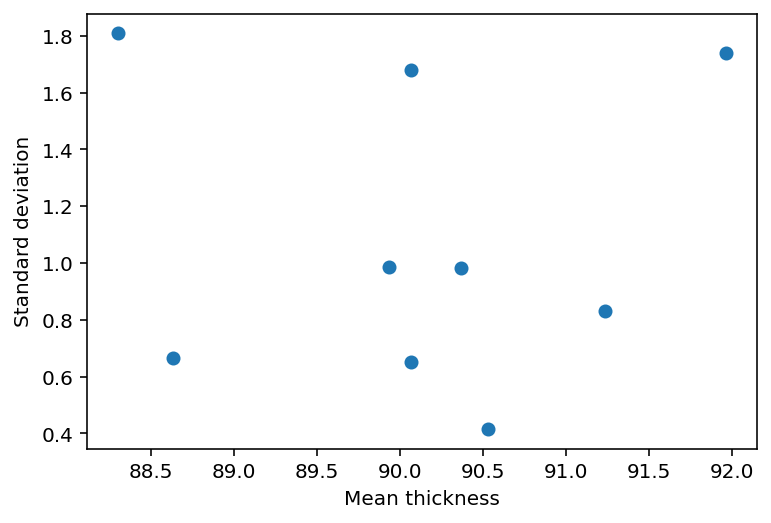

In [5]:
w_grouped = waferlayers.groupby(['Furnace','Wafer Type']).agg(['mean','std'])
plt.scatter(w_grouped[('Thickness', 'mean')],w_grouped[('Thickness', 'std')])
plt.xlabel('Mean thickness')
plt.ylabel('Standard deviation')
w_grouped

In [6]:
# 2-way ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

waferlayers  = waferlayers.rename(columns={'Wafer Type': 'WaferType'}) # Can't handle space in variable name

model = ols('Thickness ~ C(Furnace) + C(WaferType) + C(Furnace):C(WaferType)', data=waferlayers).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Furnace),4.108889,2.0,1.446038,0.261588
C(WaferType),5.875556,2.0,2.067779,0.155467
C(Furnace):C(WaferType),21.348889,4.0,3.756648,0.021618
Residual,25.573333,18.0,NaN,NaN


### 2. An experiment was conducted using an unreplicated $2^4$ factorial design to determine the effects of the amount of glue (x1), predrying temperature (x2), tunnel temperature (x3), and pressure (x4) on the adhesive force obtained in an adhesive process.

In [144]:
df = pd.DataFrame({
    'x1':[-1,1]*8,
    'x2':[-1,-1,1,1]*4,
    'x3':(([-1] * 4) + ([1] * 4)) * 2,
    'x4':[-1 * (1 if i < 8 else -1) for i in range(16)],
    'y': [3.8, 4.34, 3.54, 4.59, 3.95, 4.83, 4.86, 5.28, 3.29, 2.82, 4.59, 4.68, 2.73, 4.31, 5.16, 6.06],
})
df

,x1,x2,x3,x4,y
0,-1,-1,-1,-1,3.80
1,1,-1,-1,-1,4.34
2,-1,1,-1,-1,3.54
3,1,1,-1,-1,4.59
4,-1,-1,1,-1,3.95
5,1,-1,1,-1,4.83
6,-1,1,1,-1,4.86
7,1,1,1,-1,5.28
8,-1,-1,-1,1,3.29
9,1,-1,-1,1,2.82


### a. Estimate all the main effects and interactions. 

The effects can be estimated by estimating a linear model estimated with all interactions.

The effects are then the parameters (except the intercept) x 2.

In [145]:
model = ols('y ~ x1 * x2 * x3 * x4', data=df).fit()
# model.summary()

In [146]:
effects = 2 * model.params.drop('Intercept')
print('main effects and interactions:')
print(effects)

main effects and interactions:
x1             0.62375
x2             1.08625
x1:x2         -0.00875
x3             0.69125
x1:x3          0.32125
x2:x3          0.29875
x1:x2:x3      -0.27625
x4            -0.19375
x1:x4         -0.09875
x2:x4          0.74875
x1:x2:x4      -0.02125
x3:x4          0.02875
x1:x3:x4       0.39375
x2:x3:x4      -0.04375
x1:x2:x3:x4   -0.03375
dtype: float64


#### b. Plot the estimated effects on a normal probability plot.

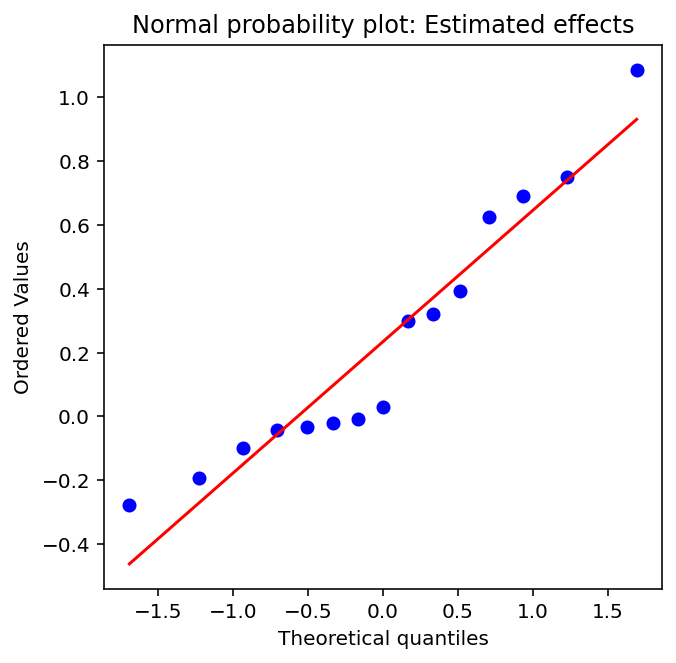

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
stats.probplot(effects.values, plot=ax)
_ = ax.set_title('Normal probability plot: Estimated effects')

#### c. Interpret your results.

The  estimated effects follow more of an S-shaped distribution than a normal distribution. There seems evidence to further  explore the significance of the effects and rejecct  the null hypothesis.

##  3. A $2^{8-4}$ fractional factorial design was run to identify sources of plutonium contamination in the radioactivity material analysis of dried shellfish at the National Institute of Standards and Technology (NIST). The data are in the table below. No contamination occurred at runs 1,4, and 9. Questions related to this problem are below the table. 

In [148]:
y = [
    0,
    3.31,
    0.0373,
    0,
    .0649,
    0.133,
    0.0461,
    0.0297,
    0,
    0.287,
    0.133,
    0.0476,
    0.133,
    5.75,
    0.0153,
    2.47,
]
df = pd.DataFrame({
    'run': list(range(1, 16+1)),
    'x1': [-1,1]*8,
    'x2': [-1,-1,1,1]*4,
    'x3': ([-1] * 4 + [1] * 4) * 2,
    'x4': [-1 if i < 8 else 1 for i in range(16)],
    'x5': [-1]*2 + [1]*4 + [-1]*2 + [1]*2 + [-1]*4 + [1]*2,
    'x6': [-1,1]*2 + [1,-1]*4 + [-1,1]*2,
    'x7': [-1,1,1,-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,1],
    'x8': [-1,1,1,-1,-1,1,1,-1,1,-1,-1,1,1,-1,-1,1],
    'y': y,
}).set_index('run')
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
run,,,,,,,,,
1,-1,-1,-1,-1,-1,-1,-1,-1,0.0000
2,1,-1,-1,-1,-1,1,1,1,3.3100
3,-1,1,-1,-1,1,-1,1,1,0.0373
4,1,1,-1,-1,1,1,-1,-1,0.0000
5,-1,-1,1,-1,1,1,1,-1,0.0649
6,1,-1,1,-1,1,-1,-1,1,0.1330
7,-1,1,1,-1,-1,1,-1,1,0.0461
8,1,1,1,-1,-1,-1,1,-1,0.0297
9,-1,-1,-1,1,1,1,-1,1,0.0000


### (a) Write down the alias relationships.

x1:x2:x3 = x7

x1:x2:x4 = x8

x1:x3:x4 = x6

x2:x3:x4 = x5

How /  Why that answer:

Let’s  assume the experiment was designed to optimize for the best possible resolution, using interactions between variables as aliases for other variables in order to estimate main effects

There are 8 variables  and 16 runs. 
The best  possible resolution is 4 (IIII).

“Design resolution refers to the length (number of letters or variables) in the smallest defining or “generalized” interaction”

Therefore we  would  expect combinations of 3  elements from x1, x2, x3, x4 to be  aliased  with 1 of x5, x6, x7, x8.

The below  code checks combinations of three elements from x1, x2, x3, x4 and compares with x5, x6, x7, x8.



In [149]:
resolution = 4
elts = list(df.columns[:4])
other_elts  = list(df.columns[4:8])
alias_combos = []
for i in range(4):
    for j in range(i+1, 4):
        for k in range(j+1, 4):
            alias_combos += [(elts[i], elts[j], elts[k])]
        
print('elements used to alias:', elts)
print('elements needing alias:',  other_elts)
print('alias combinations:', alias_combos)

elements used to alias: ['x1', 'x2', 'x3', 'x4']
elements needing alias: ['x5', 'x6', 'x7', 'x8']
alias combinations: [('x1', 'x2', 'x3'), ('x1', 'x2', 'x4'), ('x1', 'x3', 'x4'), ('x2', 'x3', 'x4')]


In [150]:
for i, (a1, a2, a3) in enumerate(alias_combos):
    for elt in other_elts:
        if ((df[a1] * df[a2] * df[a3]) == df[elt]).all():
            print('%s:%s:%s = %s'  % (a1, a2, a3, elt))

x1:x2:x3 = x7
x1:x2:x4 = x8
x1:x3:x4 = x6
x2:x3:x4 = x5


### (b) Estimate the main effects.

We use a model that estimates an intercept and coefficients for x1 to x8 and interactions of x1 with x2 to x8.

In [153]:
# Interactions between x1 and x2  to x8
model = ols(
    'y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x1:x2 + x1:x3 + x1:x4 + x1:x5 + x1:x6 + x1:x7 + x1:x8',
    data=df).fit()
# model.summary()

In [155]:
main_effects = 2 * model.params[model.params.index.map(lambda x: not ':' in x)].drop('Intercept')
print('main effects:')
main_effects

main effects:


x1    1.449713
x2   -0.862362
x3    0.603387
x4    0.651863
x5   -0.805237
x6    1.386388
x7    0.059112
x8   -0.012862
dtype: float64

### (c) Prepare a normal probability plot for the effects and interpret the results. 

As shown below, the estimated main effects do not strongly deviate from the normal distribution, showing little evidence that the main effects are statistically significant.

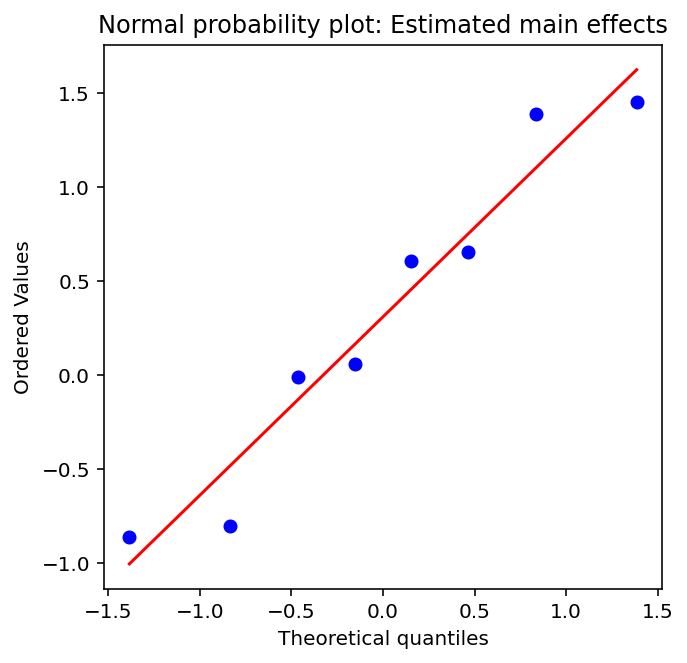

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
stats.probplot(main_effects.values, plot=ax)
_ = ax.set_title('Normal probability plot: Estimated main effects')

## This dataset is from an experiment to investigate inorganic impurities (ash) in paper. Two variables, temperature T in degrees Celsius and time t in hours, were studied. The coded predictor variables shown in the following table are:
						
x1 = (T −775)/115 

x2 = (t −3)/1.5 

and the response y is impurity percentage times $10^3$.

In [158]:
df = pd.DataFrame({
    'x1':[-1,1,-1,1,-1.5,1.5] + [0]*6,
    'x2':[-1,-1,1,1,0,0,-1.5,1.5] + [0]*4,
    'y':[211,92,216,99,222,48, 168, 179,122,175,157,146],
})
df

,x1,x2,y
0,-1.0,-1.0,211
1,1.0,-1.0,92
2,-1.0,1.0,216
3,1.0,1.0,99
4,-1.5,0.0,222
5,1.5,0.0,48
6,0.0,-1.5,168
7,0.0,1.5,179
8,0.0,0.0,122
9,0.0,0.0,175


### (a) What type of design has been used in this study? Can the design be rotated?

This study uses  a central composite design (CCD), with axial points where w = 1.5.

There are  4 point center runs with x1 = x2 =  0.

For the design to  be  rotatable, we need w  = $n_f^{0.25}$ where $n_f$ is the number of factorial points. 

In this  case, $n_f = 4$.  $n_f^{0.25} = 4^{0.25} = 1.4$.

The design is nearly rotatable but not quite.

In [159]:
4**(0.25)

1.4142135623730951

### (b) Fit a quadratic model to the data. Is this model satisfactory?

We fit a model with squared terms and interaction terms, defined below.

$y = B_0 + B_1 * x1 +  B_2 * x2 +  B_3 * x1^2 +  B_4 * x2^2 +  B_5 * x1 * x2 $

The model has a high R-squared value but only one term, x1, has a statistically significant value, and it is not a quadratic term.

So  the quadratic model is not so  satisfactory.

In [172]:
model = ols('y ~ x1 * x2 + np.power(x1, 2) + np.power(x2, 2)', data=df).fit()
model.summary()

/Users/aberke/projects/CS_MITOS/env/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     24.91
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           0.000604
Time:                        21:59:22   Log-Likelihood:                -45.909
No. Observations:                  12   AIC:                             103.8
Df Residuals:                       6   BIC:                             106.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         150.0445      7.821     19.184      0.000     130.907     169.182
x1                -58.4706      5.384    -10.861      0.000     -71.644     -45.297
x2                  3.3529      5.384      0.623      0.556      -9.821      16.526
x1:x2               0.5000      7.848      0.064      0.951     -18.704      19.704
np.power(x1, 2)    -6.5282      5.693     -1.147      0.295     -20.460       7.403
np.power(x2, 2)    10.5830      5.693      1.859      0.112      -3.349      24.514
==============================================================================
Omnibus:                        6.900   Durbin-Watson:                   2.742
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                3.519
Skew:                          -0.381   Prob(JB):                        0.172
Kurtosis:                       5.541   Cond. No.                         3.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
ols('y ~ x1', data=df).fit().summary()

/Users/aberke/projects/CS_MITOS/env/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     93.53
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           2.16e-06
Time:                        22:01:44   Log-Likelihood:                -50.366
No. Observations:                  12   AIC:                             104.7
Df Residuals:                      10   BIC:                             105.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.9167      5.088     30.052      0.000     141.579     164.254
x1           -58.4706      6.046     -9.671      0.000     -71.942     -44.999
==============================================================================
Omnibus:                        0.129   Durbin-Watson:                   2.659
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.290
Skew:                          -0.185   Prob(JB):                        0.865
Kurtosis:                       2.334   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (c) If it is important to minimize the ash value, where would you run the process? 

Only the effect for x1 is statistically significant. Thereore I would run thee process as the minimum x1 value: x1 = 775 - 115 = 660

## 5. The copper content of a manufacturing process is measured three times per day and the results are reported as parts per million. The values for 25 days are given in the table below.

In [336]:
df = pd.DataFrame({
    'sample': list(range(1,26)),
    1: [5.1,5.7,6.31,6.83,5.42,7.03,6.57, 5.96,8.15,6.11,6.49,5.12,5.59,7.59,6.72,6.3,6.33,6.91,8.05,6.39,5.63,6.51,6.91,6.28,5.07],
    2: [6.1,5.59,5,8.1,5.29,7.29,5.89,7.52,6.69,5.14,5.68,4.26,5.21,7.93,6.79,5.37,6.33,6.05,6.52,5.07,6.42,6.9,6.87,6.09,7.17],
    3: [5.5,5.29,6.07,7.96,6.71,7.54,7.08,7.29,6.06,6.68,5.51,4.49,4.94,6.9,5.23,7.08,5.8,6.03,8.51,6.86,5.39,7.4,6.83,6.71,6.11],
}).set_index('sample')
# df

### (a) Using all the data, find trial control limits for $\bar{X}$ and R charts, construct the chart, and plot the data. Is the process in statistical control? 

The control limits are printed below.

As shown in the plots, the process is not in statistical control based on these limits. The mean x values go wildly out of the mean control limits.

In [337]:
# add in mean column and range columns
df['mean'] = df.apply(lambda row: row.mean(), axis=1)
df['range'] = df.apply(lambda row: row.max() - row.min(), axis=1)
df

,1,2,3,mean,range
sample,,,,,
1,5.10,6.10,5.50,5.566667,1.00
2,5.70,5.59,5.29,5.526667,0.41
3,6.31,5.00,6.07,5.793333,1.31
4,6.83,8.10,7.96,7.630000,1.27
5,5.42,5.29,6.71,5.806667,1.42
6,7.03,7.29,7.54,7.286667,0.51
7,6.57,5.89,7.08,6.513333,1.19
8,5.96,7.52,7.29,6.923333,1.56
9,8.15,6.69,6.06,6.966667,2.09


In [338]:
def get_control_limit_values(n):
    """Returns A2, D3, D4 values"""
    if n == 25:
        A2 = 0.153
        D3 = 0.459
        D4 = 1.541
    elif n == 24:
        A2 = 0.157
        D3 = 0.452
        D4 = 1.548
    elif n == 23:
        A2 = 0.162
        D3 = 0.443
        D4 = 1.557
    elif n == 22:
        A2 = 0.167
        D3 = 0.434
        D4 = 1.566
    elif n == 21:
        A2 = 0.173
        D3 = 0.425
        D4 = 1.575
    elif n == 20:
        A2 = 0.180
        D3 = 0.414
        D4 = 1.586
    elif n == 19:
        A2 = 0.187
        D3 = 0.404 
        D4 = 1.596
    elif n == 18:
        A2 = 0.194 
        D3 = 0.392 
        D4 = 1.608
    elif n == 17:
        A2 = 0.203 
        D3 = 0.379
        D4 = 1.621
    elif n == 16:
        A2 = 0.212   
        D3 = 0.364
        D4 = 1.636
    elif n == 15:
        A2 = 0.223 
        D3 = 0.348
        D4 = 1.652 
    elif n == 14:
        A2 = 0.203 
        D3 = 0.379
        D4 = 1.621
    elif n == 13:
        A2 = 0.249 
        D3 = 0.308
        D4 = 1.692
    elif n == 12:
        A2 = 0.266 
        D3 = 0.284
        D4 = 1.716
    elif n == 11:
        A2 = 0.285 
        D3 = 0.256
        D4 = 1.744
    elif n == 4:
        A2 = 0.729
        D3 = 0
        D4 = 2.282
    elif n == 3:
        A2 = 1.023
        D3 = 0
        D4 = 2.575
    else:
        raise Exception('control limits not implemented for n = %s' % n)
    return (A2, D3, D4)

In [339]:
def get_control_limits(df):
    n = len(df)
    # compute control limits  using  constants   from a table:
    (A2, D3, D4) = get_control_limit_values(n)
    print('n = %s' % n)
    print('----------------')
    print('constants used:')
    print('A2 = %s' % A2)
    print('D3 = %s' % D3)
    print('D4 = %s' % D4)
    print('----------------')

    x_bar_bar = df['mean'].mean()
    r_bar = df['range'].mean()

    x_UCL = x_bar_bar + A2*r_bar
    x_CL = x_bar_bar
    x_LCL = x_bar_bar - A2*r_bar
    r_UCL = D4 * r_bar
    r_LCL = D3 * r_bar
    return (x_CL, x_UCL, x_LCL, r_bar, r_UCL, r_LCL)

(x_CL, x_UCL, x_LCL, r_bar, r_UCL, r_LCL) = get_control_limits(df)
    
print('x UCL = %s '% x_UCL)
print('x CL = %s '% x_CL)
print('x  LCL = %s '% x_LCL)

print('R UCL = %s '% r_UCL)
print('R = %s '% r_bar)
print('R LCL = %s '% r_LCL)

# df

n = 25
----------------
constants used:
A2 = 0.153
D3 = 0.459
D4 = 1.541
----------------
x UCL = 6.501613333333333 
x CL = 6.324133333333333 
x  LCL = 6.146653333333333 
R UCL = 1.7875599999999998 
R = 1.16 
R LCL = 0.53244 


In [340]:
def control_charts(df, x_CL, x_UCL, x_LCL, r_bar, r_UCL, r_LCL):
    fig, (ax_bar, ax_r) = plt.subplots(2,1, sharex=True)
    # x chart
    ax_bar.plot(df['mean'], '-o', c='blue')
    ax_bar.plot(df.index, [x_CL]*len(df.index), c='gray')
    ax_bar.plot(df.index, [x_UCL]*len(df.index), c='gray')
    ax_bar.plot(df.index, [x_LCL]*len(df.index), c='gray')
    ax_bar.set_ylabel('means')
    # r chart
    ax_r.plot(df['range'], '-o', c='blue')
    ax_r.plot(df.index, [r_bar]*len(df.index), c='gray')
    ax_r.plot(df.index, [r_UCL]*len(df.index), c='gray')
    ax_r.plot(df.index, [r_LCL]*len(df.index), c='gray')
    ax_r.set_ylabel('ranges')
    fig.suptitle('Control Charts')
    plt.show()

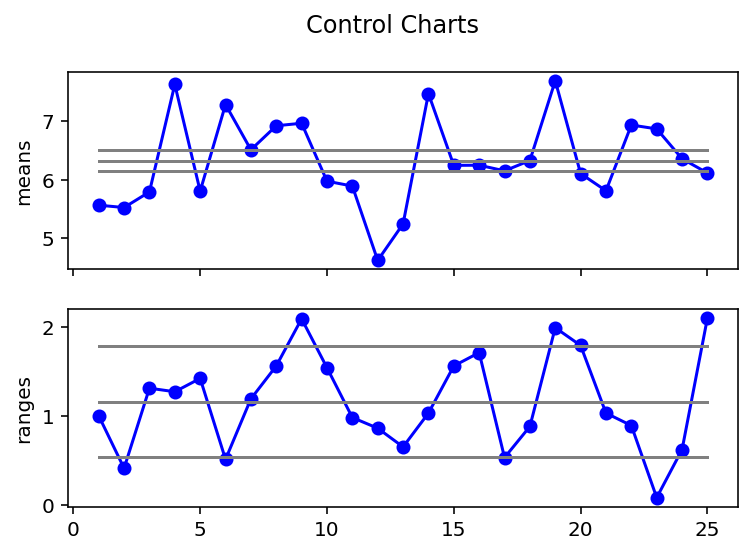

In [341]:
control_charts(df, x_CL, x_UCL, x_LCL, r_bar, r_UCL, r_LCL)

### (b) If necessary, revise the control limits computed in part (a), assuming any samples that plot outside the control limits can be eliminated. Continue to eliminate points outside the control limits and revise, until all points plot between control limits.


We iteratively prune samples that are most outside the control limits until we have a set of  control points within the control limits defined by them.

In [342]:
def out_of_cl(v, ucl, lcl):
    v_l  = np.abs(lcl - v if v < lcl else 0)
    v_u = np.abs(v - ucl if v > ucl else 0)
    return max(v_l, v_u)

n = 25
----------------
constants used:
A2 = 0.153
D3 = 0.459
D4 = 1.541
----------------


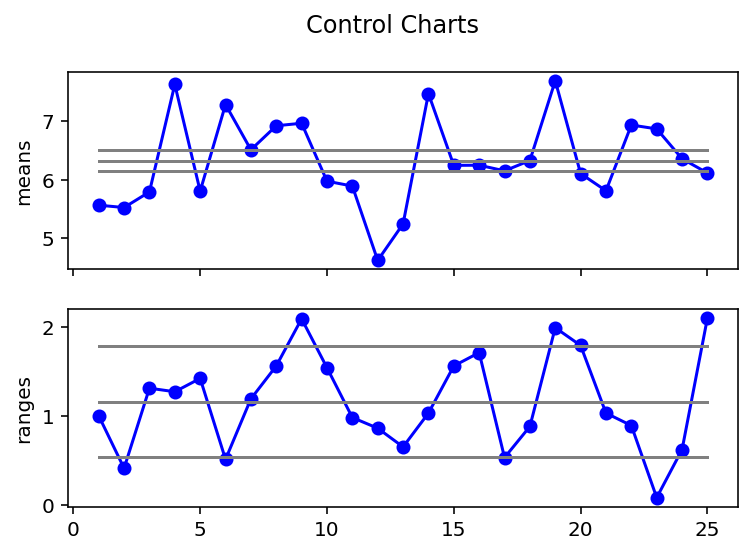

n = 24
----------------
constants used:
A2 = 0.157
D3 = 0.452
D4 = 1.548
----------------


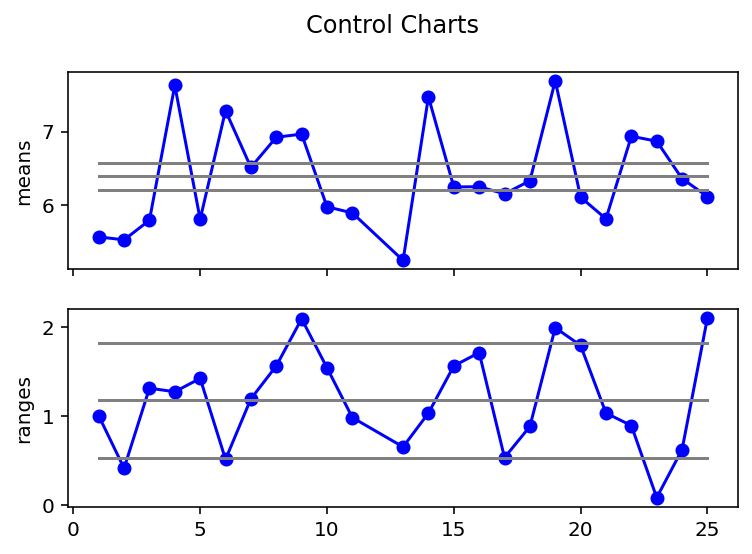

n = 23
----------------
constants used:
A2 = 0.162
D3 = 0.443
D4 = 1.557
----------------


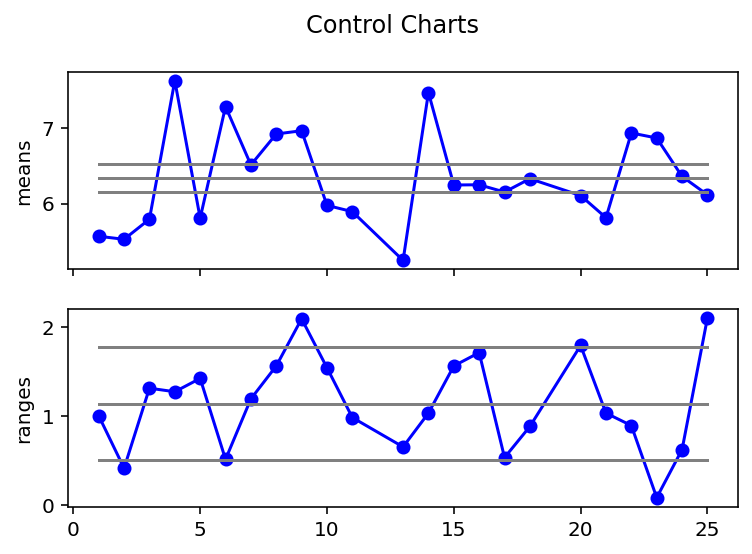

n = 22
----------------
constants used:
A2 = 0.167
D3 = 0.434
D4 = 1.566
----------------


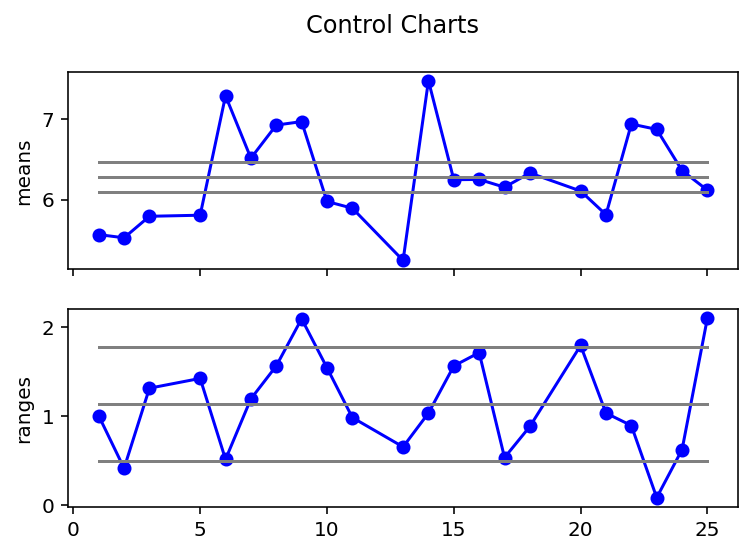

n = 21
----------------
constants used:
A2 = 0.173
D3 = 0.425
D4 = 1.575
----------------


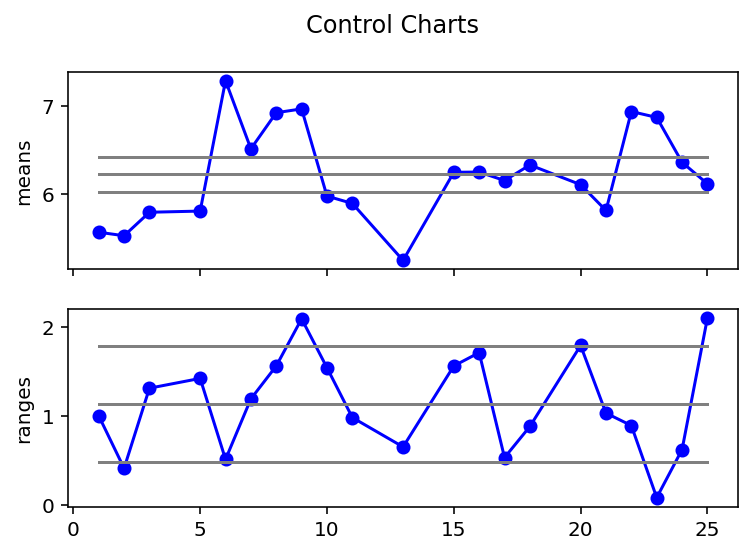

n = 20
----------------
constants used:
A2 = 0.18
D3 = 0.414
D4 = 1.586
----------------


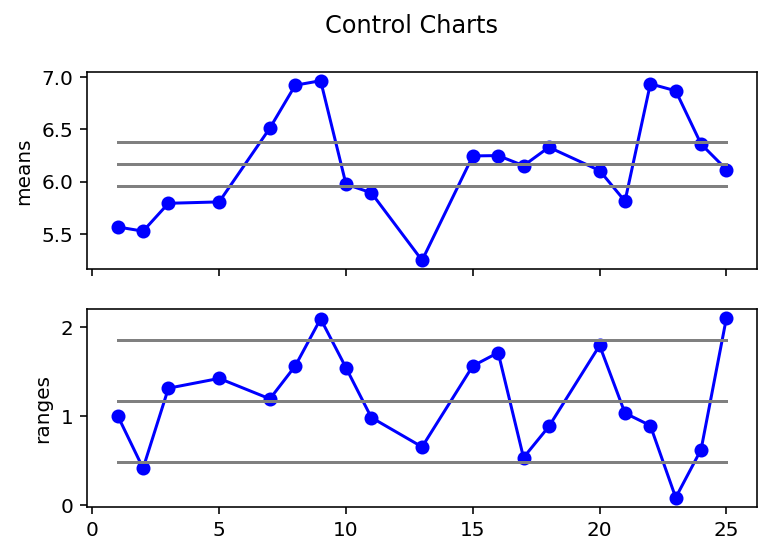

n = 19
----------------
constants used:
A2 = 0.187
D3 = 0.404
D4 = 1.596
----------------


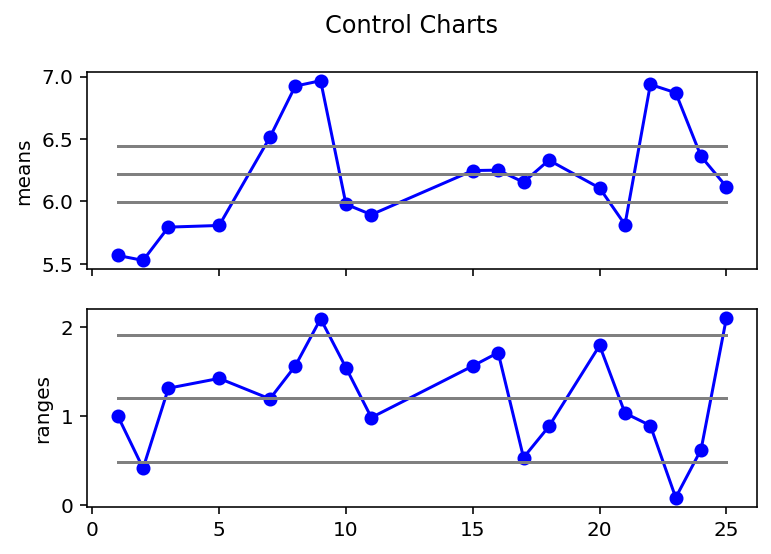

n = 18
----------------
constants used:
A2 = 0.194
D3 = 0.392
D4 = 1.608
----------------


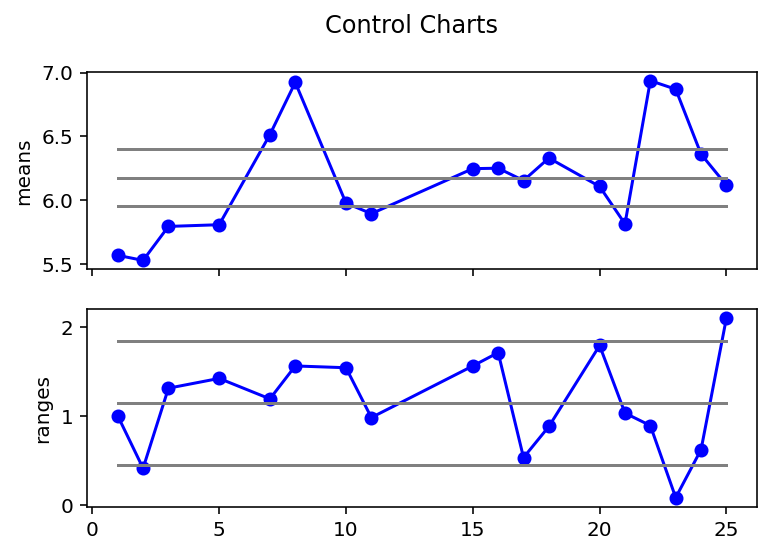

n = 17
----------------
constants used:
A2 = 0.203
D3 = 0.379
D4 = 1.621
----------------


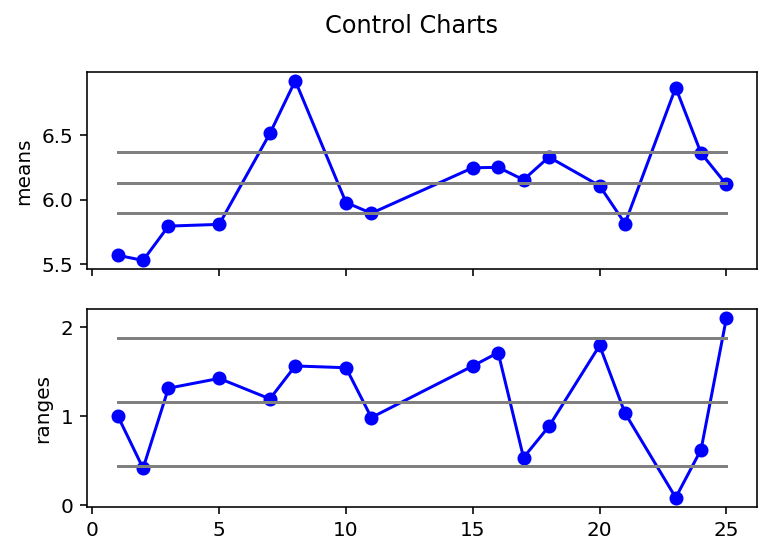

n = 16
----------------
constants used:
A2 = 0.212
D3 = 0.364
D4 = 1.636
----------------


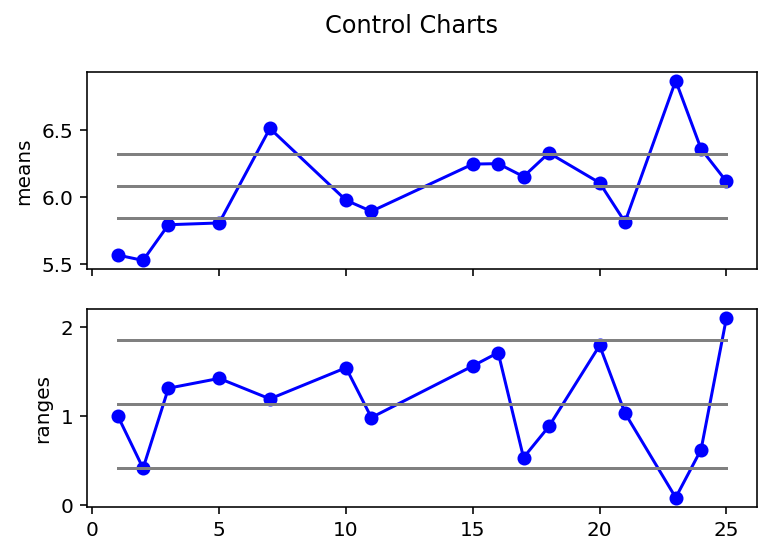

n = 15
----------------
constants used:
A2 = 0.223
D3 = 0.348
D4 = 1.652
----------------


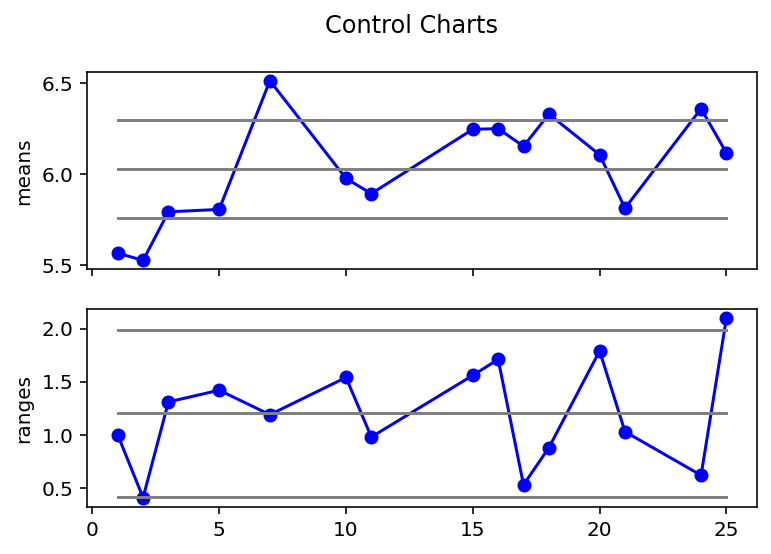

n = 14
----------------
constants used:
A2 = 0.203
D3 = 0.379
D4 = 1.621
----------------


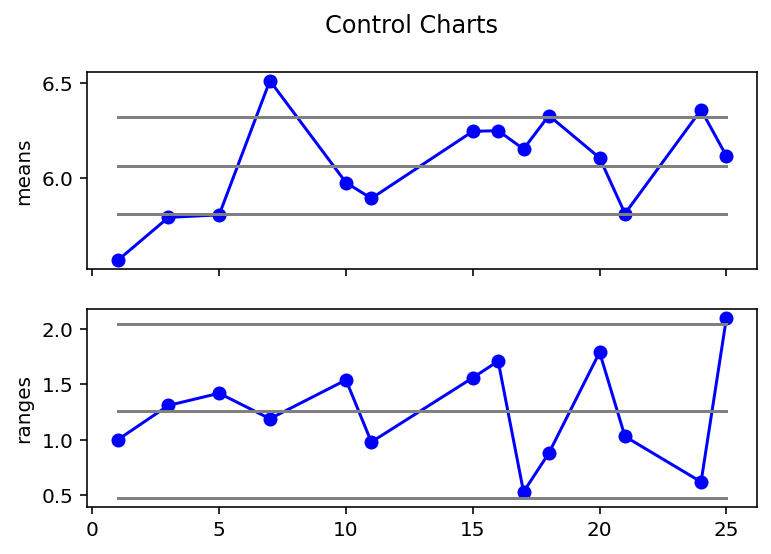

n = 13
----------------
constants used:
A2 = 0.249
D3 = 0.308
D4 = 1.692
----------------


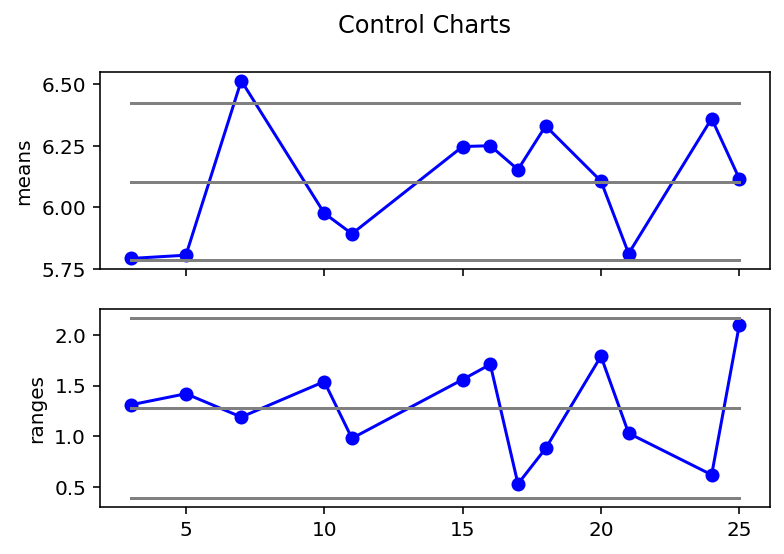

n = 12
----------------
constants used:
A2 = 0.266
D3 = 0.284
D4 = 1.716
----------------


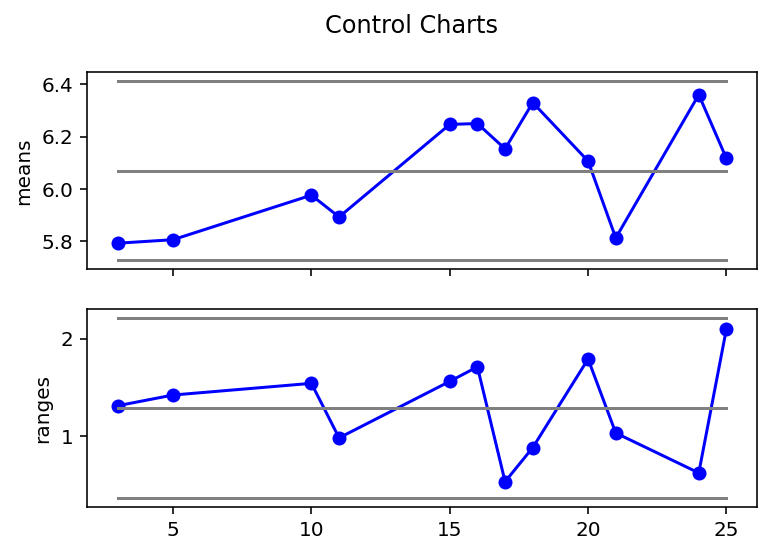

In [343]:
dfi = df
for i in range(len(df)):
    if len(dfi)  < 3:
        break
    # compute  CL's
    (x_CLi, x_UCLi, x_LCLi, r_bari, r_UCLi, r_LCLi) = get_control_limits(dfi)
    # plot
    control_charts(dfi, x_CLi, x_UCLi, x_LCLi, r_bari, r_UCLi, r_LCLi)
    # compute  how  much the ranges differ from r_CL's control limits
    # compute  how  much the means differ from x_CL's control limits
    dfi['mean out of cl'] = dfi['mean'].apply(lambda m: out_of_cl(m, x_UCLi, x_LCLi))
    dfi['r out of cl'] = dfi['range'].apply(lambda r: out_of_cl(r, r_UCLi, r_LCLi))

    # drop most  out of control
    if (dfi['mean out of cl'] > 0).any():
        dfi =  dfi.drop(dfi['mean out of cl'].idxmax())
    elif (dfi['r out of cl'] > 0).any():
        dfi =  dfi.drop(dfi['r out of cl'].idxmax())
    else:
        break

In [344]:
print('Control limits for in-control points:\n')
print('x UCL = %s '% x_UCLi)
print('x CL = %s '% x_CLi)
print('x  LCL = %s '% x_LCLi)
print('R UCL = %s '% r_UCLi)
print('R = %s '% r_bari)
print('R LCL = %s '% r_LCLi)

Control limits for in-control points:

x UCL = 6.4134738888888885 
x CL = 6.070555555555555 
x  LCL = 5.727637222222222 
R UCL = 2.2122100000000002 
R = 1.2891666666666668 
R LCL = 0.36612333333333336 


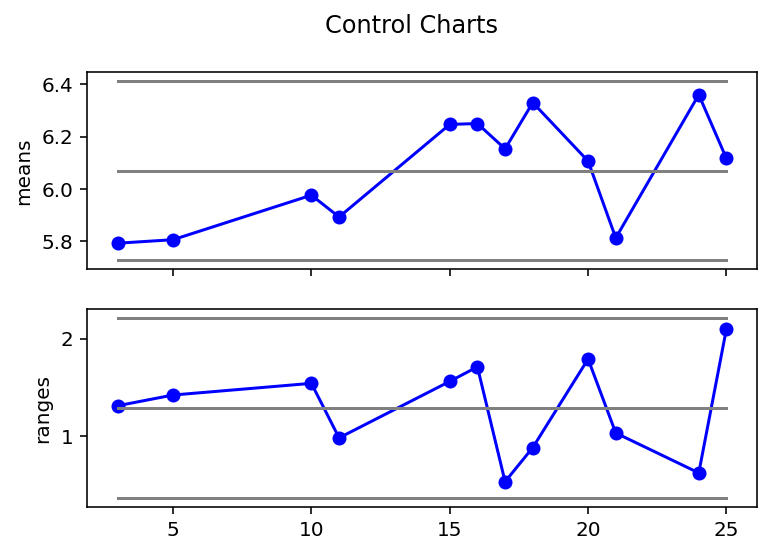

,1,2,3,mean,range,mean out of cl,r out of cl
sample,,,,,,,
3,6.31,5.00,6.07,5.793333,1.31,0,0
5,5.42,5.29,6.71,5.806667,1.42,0,0
10,6.11,5.14,6.68,5.976667,1.54,0,0
11,6.49,5.68,5.51,5.893333,0.98,0,0
15,6.72,6.79,5.23,6.246667,1.56,0,0
16,6.30,5.37,7.08,6.250000,1.71,0,0
17,6.33,6.33,5.80,6.153333,0.53,0,0
18,6.91,6.05,6.03,6.330000,0.88,0,0
20,6.39,5.07,6.86,6.106667,1.79,0,0


In [345]:
control_charts(dfi, x_CLi, x_UCLi, x_LCLi, r_bari, r_UCLi, r_LCLi)
dfi

### (c) Given that the specifications are at 6.0 + / − 0.5, estimate Cp and Cpk for the in-control process and interpret these ratios.

In [355]:
USL = 6.5
LSL = 5.5

n = len(dfi)
print('n = %s' % n)
d2 = 3.258
print('d2  = %s' %  d2)

sigma = dfi['range'].mean()/d2
print('σ = %s' %  sigma)

mu = dfi['mean'].mean()
print('μ = %s' % mu)
print('')

Cp = (USL - LSL)/(6 * sigma)
print('Cp = (USL - LSL)/(6σ) = %s' % Cp)

Cpk = min((USL - mu)/(3*sigma), (mu - LSL)/(3*sigma))
print('Cpk = min[ (USL - μ)/3σ, (μ - LSL)/3σ ] = %s' % Cpk)

n = 12
d2  = 3.258
σ = 0.39569265397994685
μ = 6.070555555555555

Cp = (USL - LSL)/(6σ) = 0.42120232708468
Cpk = min[ (USL - μ)/3σ, (μ - LSL)/3σ ] = 0.3617659987071756


The ratios are both very small. This is because sigma is relatively large compared to the specified spread (6.5 - 5.5).

The Cpk is slightly smaller than the centered process control limit, Cp, indicative of how the mean value is slightly off-centered between the specified control limits.